In [1]:
#Import libraries

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the dataset

In [4]:
df = pd.read_csv('pmsm_temperature_data.csv')
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
ambient           998070 non-null float64
coolant           998070 non-null float64
u_d               998070 non-null float64
u_q               998070 non-null float64
motor_speed       998070 non-null float64
torque            998070 non-null float64
i_d               998070 non-null float64
i_q               998070 non-null float64
pm                998070 non-null float64
stator_yoke       998070 non-null float64
stator_tooth      998070 non-null float64
stator_winding    998070 non-null float64
profile_id        998070 non-null int64
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [6]:
df_test = df[(df['profile_id'] == 65) | (df['profile_id'] == 72)]
df = df[(df['profile_id'] != 65) & (df['profile_id'] != 72)]

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55393 entries, 644143 to 998069
Data columns (total 13 columns):
ambient           55393 non-null float64
coolant           55393 non-null float64
u_d               55393 non-null float64
u_q               55393 non-null float64
motor_speed       55393 non-null float64
torque            55393 non-null float64
i_d               55393 non-null float64
i_q               55393 non-null float64
pm                55393 non-null float64
stator_yoke       55393 non-null float64
stator_tooth      55393 non-null float64
stator_winding    55393 non-null float64
profile_id        55393 non-null int64
dtypes: float64(12), int64(1)
memory usage: 5.9 MB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942677 entries, 0 to 982769
Data columns (total 13 columns):
ambient           942677 non-null float64
coolant           942677 non-null float64
u_d               942677 non-null float64
u_q               942677 non-null float64
motor_speed       942677 non-null float64
torque            942677 non-null float64
i_d               942677 non-null float64
i_q               942677 non-null float64
pm                942677 non-null float64
stator_yoke       942677 non-null float64
stator_tooth      942677 non-null float64
stator_winding    942677 non-null float64
profile_id        942677 non-null int64
dtypes: float64(12), int64(1)
memory usage: 100.7 MB


In [9]:
df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000
mean,-0.030010,-0.008238,-0.021835,0.007720,0.003210,0.020170,-0.002465,0.019958,-0.005093,-0.004537,-0.002131,-0.000204,49.779981
std,1.007729,1.009503,0.994308,0.996054,0.996456,0.999063,1.000106,0.999683,1.001414,1.004053,0.999985,0.998672,22.337115
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.634542,-1.041886,-0.854390,-0.881885,-0.951878,-0.265042,-0.760764,-0.254672,-0.667836,-0.747183,-0.761951,-0.705774,31.000000
50%,0.242495,-0.185147,0.225416,-0.089520,-0.140245,-0.121022,0.196713,-0.091449,0.099152,-0.056538,0.009582,0.009203,55.000000
75%,0.681905,0.698607,0.356361,0.859836,0.855827,0.561778,1.013952,0.543750,0.677849,0.688808,0.770775,0.724097,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


In [10]:
#Check for null values

In [11]:
df.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

There are no missing values in the dataset.

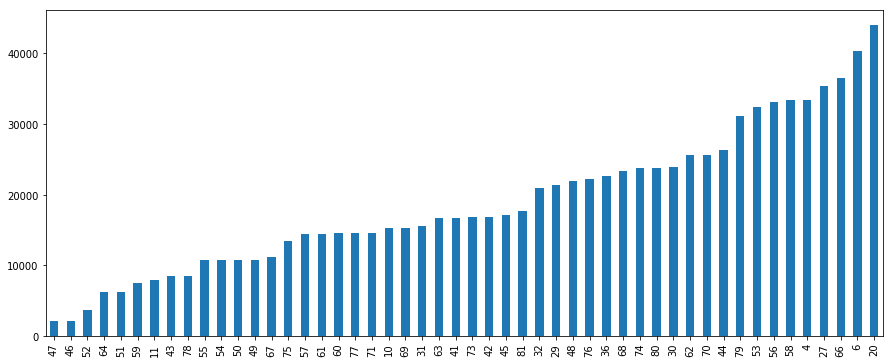

In [12]:
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind = 'bar')

As we can see, session ids 66, 6 and 20 have the most number of measurements recorded.

In [13]:
df.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

In [14]:
#Plotting Distribution and Boxplot for all the features to check for skewness

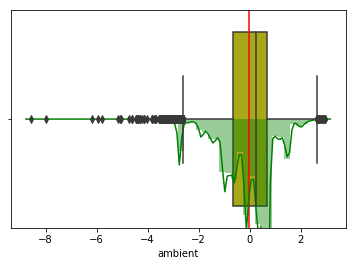

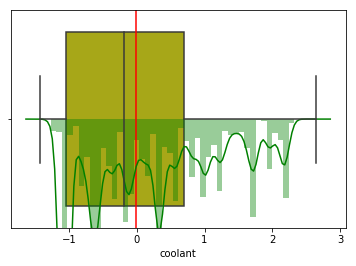

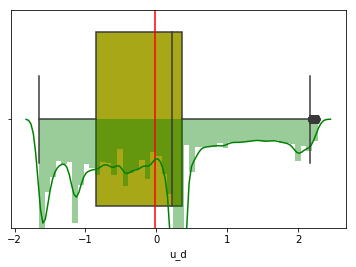

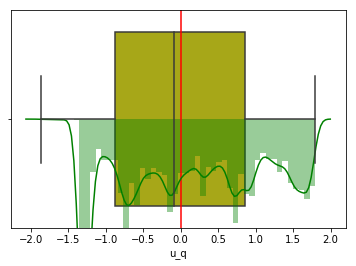

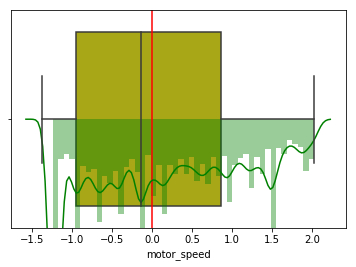

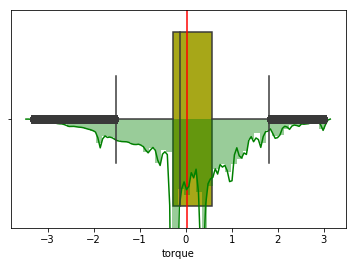

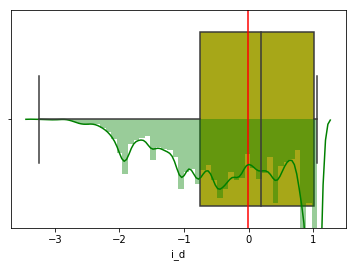

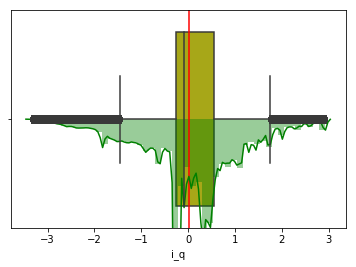

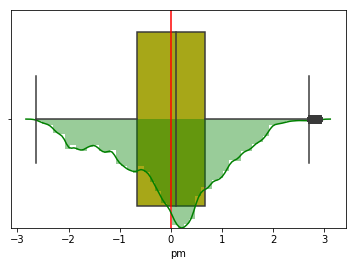

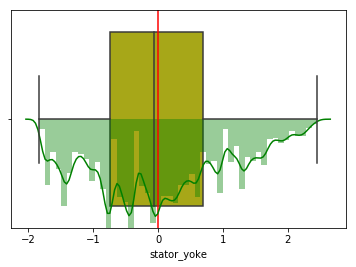

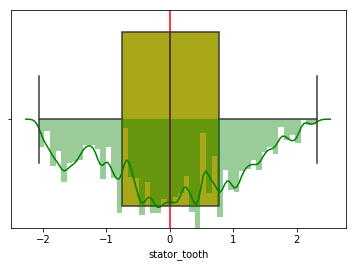

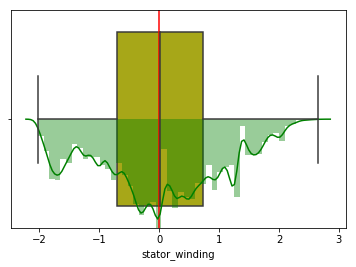

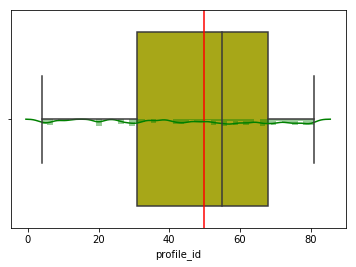

In [15]:
for i in df.columns:
    sns.distplot(df[i],color='g')
    sns.boxplot(df[i],color = 'y')
    plt.vlines(df[i].mean(),ymin = -1,ymax = 1,color = 'r')#drawing the mean line
    plt.show()

As we can see from the the above plots, the mean and median for most of the plots are very close to each other. So the data seems to have low skewness for almost all variables.

Checking skewness and kurtosis numerically

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.

In [16]:
#for skewness (−1,1) and (−2,2) for kurtosis is an acceptable range for being normally distributed.
import scipy.stats as stats
for i in df.columns:
    print(i,' :\nSkew : ',df[i].skew(),' : \nKurtosis : ',df[i].kurt())
    print()

ambient  :
Skew :  -0.8071873478865997  : 
Kurtosis :  0.6969970305203854

coolant  :
Skew :  0.6405765703677487  : 
Kurtosis :  -0.762280458904407

u_d  :
Skew :  0.21732958406019895  : 
Kurtosis :  -0.5172885804724348

u_q  :
Skew :  0.18514589739802864  : 
Kurtosis :  -1.2623624326900413

motor_speed  :
Skew :  0.3326222639822973  : 
Kurtosis :  -1.152694198978819

torque  :
Skew :  -0.053666005918621015  : 
Kurtosis :  0.777461848244013

i_d  :
Skew :  -0.6198973941589144  : 
Kurtosis :  -0.7509222702006975

i_q  :
Skew :  -0.08850143002199985  : 
Kurtosis :  0.7775825670933418

pm  :
Skew :  -0.24570361489011244  : 
Kurtosis :  -0.33467680472022776

stator_yoke  :
Skew :  0.25188191404697025  : 
Kurtosis :  -0.7134785655139653

stator_tooth  :
Skew :  -0.08028656543420369  : 
Kurtosis :  -0.7536349828238866

stator_winding  :
Skew :  -0.04548823290271412  : 
Kurtosis :  -0.7012550470798771

profile_id  :
Skew :  -0.5391816798110003  : 
Kurtosis :  -0.7533926942030775



As it is not highly skewed data and looking at the values of the dataset it seems there already has been some normalization done.

In [17]:
#Correlation is a statistic that measures the degree to which two variables move in relation to each other.
#It ranges from (-1,1),Nearer to -1,1 referes to high correlation and 0 means less correlation

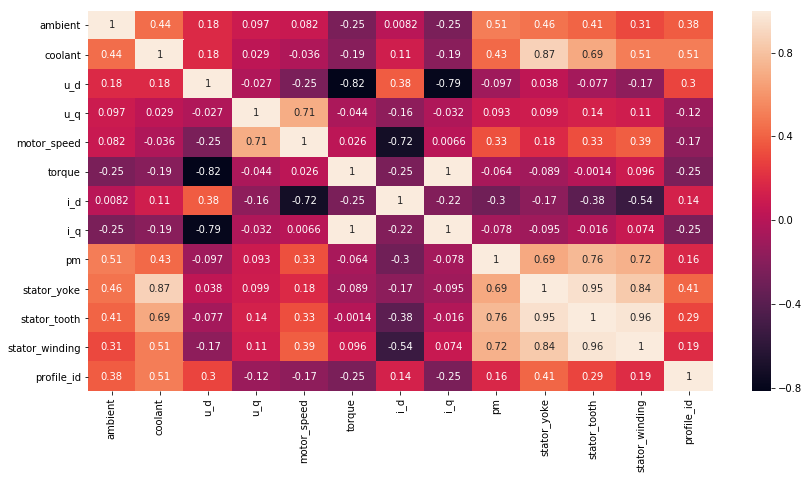

In [18]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True);

From the heatmap above, we can see that torque and q component of current are almost perfectly correlated. Also there seems to be a very high correlation between temperature measurements of stator yoke, stator tooth and stator windings.

For a random measurement, we can try to compare the temperatures of the 3 stator components.



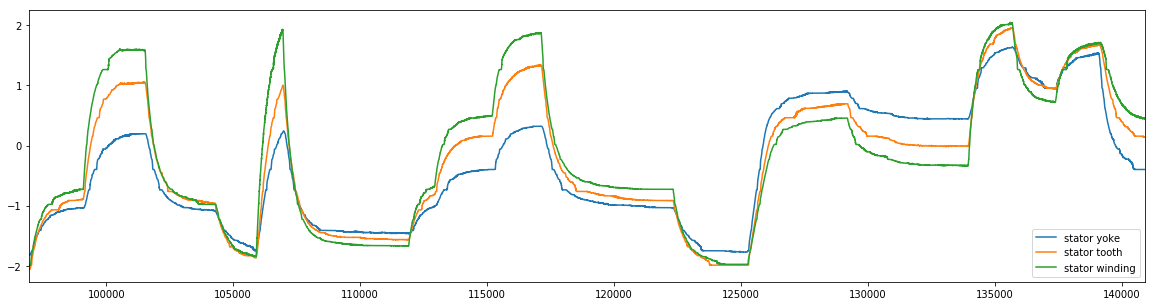

In [19]:
plt.figure(figsize=(20,5))
df[df['profile_id'] == 20]['stator_yoke'].plot(label = 'stator yoke')
df[df['profile_id'] == 20]['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label = 'stator winding')
plt.legend();

As we can see from the plot, all three stator components follow a similar measurment variance.

As the dataset author mentioned, the records in the same profile id have been sorted by time, we can assume that these recordings have been arranged in series of time.

Due to this we can infer that there has not been much time given for the motor to cool down in between recording the sensor data as we can see that initially the stator yoke temperature is low as compared to temperature of stator winding but as we progress in time, the stator yoke temperature goes above the temperature of stator winding.

As profile_id is an id for each measurement session, we can remove it from any furthur analysis and model building.

In [20]:
df.drop('profile_id',axis = 1,inplace=True)
df_test.drop('profile_id',axis = 1,inplace=True)

### Statistical Analysis of Variables

We'll see which particular variables contribute to the rotor temperature individually by checking their statistical significance.

#### Ambient Temperature

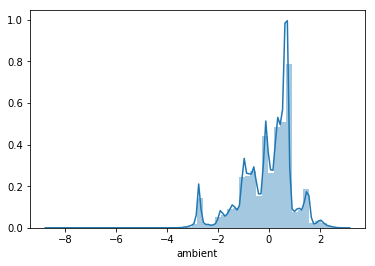

In [21]:
sns.distplot(df['ambient'])

In [22]:
from scipy.stats import shapiro
shapiro(df['ambient'])

(0.9440718293190002, 0.0)

In [23]:
shapiro(df['pm'])

(0.9890855550765991, 0.0)

H0 : variance_ambient = variance_pm #Null Hypothesis

H1 : variance_ambient != variance_pm # alternative hypothesis

In [24]:
from scipy.stats import bartlett
bartlett(df['ambient'],df['pm'])

BartlettResult(statistic=37.25665813656089, pvalue=1.0356081340638338e-09)

pvalue is less than 0.05. So we reject the null hypothesis and can say that variance for ambient temperature is not equal to the variance of rotor temperature.

#### Coolant Temperature

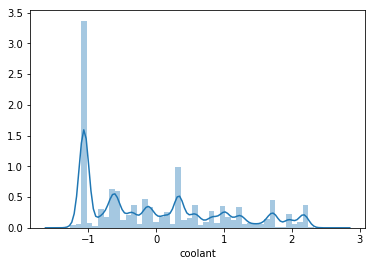

In [25]:
sns.distplot(df['coolant'])

In [26]:
from scipy.stats import shapiro
shapiro(df['coolant'])

(0.8946822285652161, 0.0)

In [27]:
shapiro(df['pm'])

(0.9890855550765991, 0.0)

H0 : variance_coolant = variance_pm  #Null Hypothesis

H1 : variance_coolant != variance_pm  # alternative hypothesis

In [28]:
from scipy.stats import bartlett
bartlett(df['coolant'],df['pm'])

BartlettResult(statistic=61.01729421073871, pvalue=5.657562879855381e-15)

pvalue is less than 0.05. So we reject the null hypothesis and can say that variance for coolant temperature is not equal to the variance of rotor temperature.

#### Voltage d-component

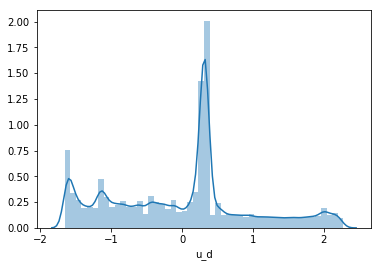

In [29]:
sns.distplot(df['u_d'])

In [30]:
from scipy.stats import shapiro
shapiro(df['u_d'])

(0.9543233513832092, 0.0)

In [31]:
shapiro(df['pm'])

(0.9890855550765991, 0.0)

H0 : variance_u_d = variance_pm

H1 : variance_u_d != variance_pm

In [32]:
from scipy.stats import bartlett
bartlett(df['u_d'],df['pm'])

BartlettResult(statistic=47.80373697690372, pvalue=4.710932327121431e-12)

pvalue is less than 0.05. So we reject the null hypothesis and can say that variance for voltage d-component is not equal to the variance of rotor temperature

#### Voltage q-component

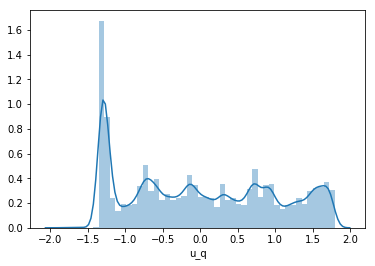

In [33]:
sns.distplot(df['u_q'])

In [34]:
from scipy.stats import shapiro
shapiro(df['u_q'])

(0.9276503920555115, 0.0)

In [35]:
shapiro(df['pm'])

(0.9890855550765991, 0.0)

H0 : variance_u_q = variance_pm

H1 : variance_u_q != variance_pm

In [36]:
from scipy.stats import bartlett
bartlett(df['u_q'],df['pm'])

BartlettResult(statistic=27.15232167072602, pvalue=1.880392472250665e-07)

pvalue is less than 0.05. So we reject the null hypothesis and can say that variance for voltage q-component is not equal to the variance of rotor temperature.

#### Motor speed

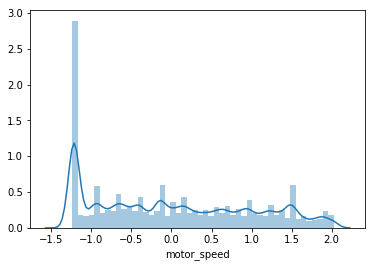

In [37]:
sns.distplot(df['motor_speed'])

In [38]:
from scipy.stats import shapiro
shapiro(df['motor_speed'])

(0.9210241436958313, 0.0)

In [39]:
shapiro(df['pm'])

(0.9890855550765991, 0.0)

H0 : variance_motor_speed = variance_pm

H1 : variance_motor_speed != variance_pm

In [40]:
from scipy.stats import bartlett
bartlett(df['motor_speed'],df['pm'])

BartlettResult(statistic=23.21763581632128, pvalue=1.446645750911655e-06)

pvalue is less than 0.05. So we reject the null hypothesis and can say that variance of motor speed is not equal to the variance of rotor temperature.

#### Current d-component

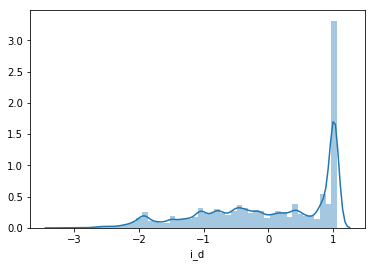

In [41]:
sns.distplot(df['i_d'])

In [42]:
from scipy.stats import shapiro
shapiro(df['i_d'])

(0.8836645483970642, 0.0)

In [43]:
shapiro(df['pm'])

(0.9890855550765991, 0.0)

H0 : variance_i_d = variance_pm

H1 : variance_i_d != variance_pm

In [44]:
from scipy.stats import bartlett
bartlett(df['i_d'],df['pm'])

BartlettResult(statistic=1.6089899795019313, pvalue=0.2046338379791107)

pvalue is higher than 0.05. So we fail to reject the null hypothesis and can say that we do not have enough evidence to reject the null hypothesis. So we do not have enough evidence to prove that variance of d component of current is not equal to the variance of motor temperature.

#### Current q-component

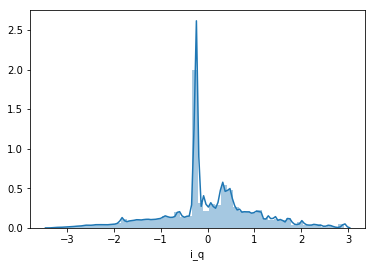

In [45]:
sns.distplot(df['i_q'])

In [46]:
from scipy.stats import shapiro
shapiro(df['i_q'])

(0.9700843691825867, 0.0)

In [47]:
shapiro(df['pm'])

(0.9890855550765991, 0.0)

H0 : variance_i_q = variance_pm

H1 : variance_i_q != variance_pm

In [48]:
from scipy.stats import bartlett
bartlett(df['i_q'],df['pm'])

BartlettResult(statistic=2.8208056168633027, pvalue=0.09304969011621197)

pvalue is higher than 0.05. So we fail to reject the null hypothesis and can say that we do not have enough evidence to reject the null hypothesis. So we do not have enough evidence to prove that variance of q component of current is not equal to the variance of motor temperature.

#### Shuffling the data

In [49]:
df = df.sample(frac=1,random_state=3)
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
905495,0.270204,0.288879,0.462250,-0.247227,-0.678016,-0.535209,0.968799,-0.573988,-0.466908,0.182942,0.134773,0.080600
980709,-0.123966,1.937632,0.299465,-1.293001,-1.222430,-0.255640,1.029135,-0.245726,-0.637503,1.329132,0.770201,0.321009
740606,0.688609,-0.171957,1.522243,1.061857,1.528602,-0.876003,-0.845077,-0.820782,0.157866,-0.065629,-0.014255,0.015097
225890,-1.158055,-1.042933,-0.469943,1.475568,1.834745,-0.004009,-0.777329,-0.018343,0.303484,-0.740729,-0.414880,-0.266328
940496,0.688188,1.747456,0.947134,0.657506,-0.151493,-0.823026,0.873817,-0.907738,0.736868,1.417517,0.999193,0.515266


The data description did not provide us with any information on the units of measure. So its difficult to interpret the values measured

### Exploratory Data Analysis

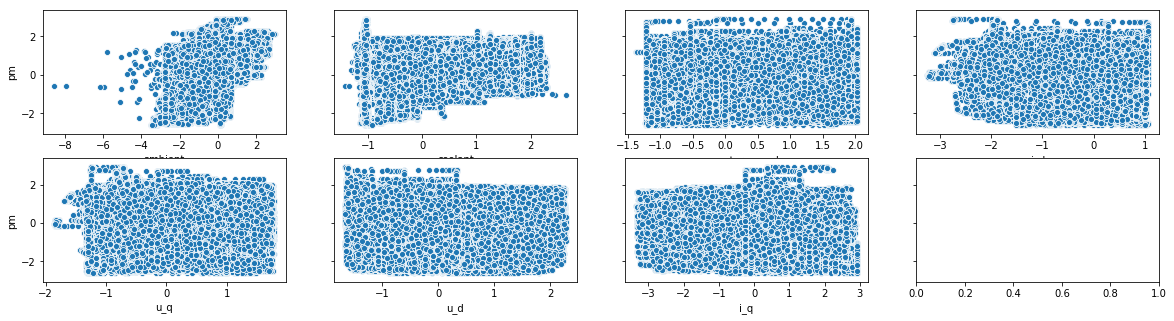

In [50]:
fig, axes = plt.subplots(2, 4, figsize=(20, 5),sharey=True)
sns.scatterplot(df['ambient'],df['pm'],ax=axes[0][0])
sns.scatterplot(df['coolant'],df['pm'],ax=axes[0][1])
sns.scatterplot(df['motor_speed'],df['pm'],ax=axes[0][2])
sns.scatterplot(df['i_d'],df['pm'],ax=axes[0][3])
sns.scatterplot(df['u_q'],df['pm'],ax=axes[1][0])
sns.scatterplot(df['u_d'],df['pm'],ax=axes[1][1])
sns.scatterplot(df['i_q'],df['pm'],ax=axes[1][2])


As we want to predict the temperatures of stator components and rotor(pm), we will drop these values from our dataset for regression. Also, torque is a quantity, which is not reliably measurable in field applications, so this feature shall be omitted in this modelling.

In [51]:
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['pm','stator_yoke','stator_tooth','stator_winding','torque'],axis = 1)
X_df_test = df_test.drop(['pm','stator_yoke','stator_tooth','stator_winding','torque'],axis = 1)
X

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q
905495,0.270204,0.288879,0.462250,-0.247227,-0.678016,0.968799,-0.573988
980709,-0.123966,1.937632,0.299465,-1.293001,-1.222430,1.029135,-0.245726
740606,0.688609,-0.171957,1.522243,1.061857,1.528602,-0.845077,-0.820782
225890,-1.158055,-1.042933,-0.469943,1.475568,1.834745,-0.777329,-0.018343
940496,0.688188,1.747456,0.947134,0.657506,-0.151493,0.873817,-0.907738
334701,0.567773,2.179385,0.184844,1.701340,1.753579,-0.491803,-0.253110
970735,-0.503207,0.792959,0.336665,-1.322363,-1.222430,1.029150,-0.245701
963858,0.062732,1.690038,0.299669,-1.284062,-1.222428,1.029160,-0.245717
865519,0.328729,-0.636870,2.218716,-0.557558,0.580682,-1.731411,-1.690000
507954,1.094502,-0.602857,-0.792172,-0.053149,-0.469331,0.081380,1.510606


In [52]:
mm = MinMaxScaler()
X = mm.fit_transform(X)
X_df_test = mm.fit_transform(X_df_test)
y = df['pm']
y_df_test = df_test['pm']
X = pd.DataFrame(X,columns = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d','i_q'])
X_df_test = pd.DataFrame(X_df_test,columns = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d','i_q'])
y.reset_index(drop = True,inplace = True)
y_df_test.reset_index(drop = True,inplace = True)

In [53]:
X.shape

(942677, 7)

In [54]:
y.shape

(942677,)

In [55]:
import joblib
joblib.dump(mm,'transform.save')

['transform.save']

In [56]:
X=X.values
y=y.values

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [58]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [59]:
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred=lr.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
mean_squared_error(y_test,y_pred)

0.5238565122224468

In [63]:
mean_squared_error(y_test, y_pred, squared=False)

0.7237793256390008

In [64]:
X_train.shape

(659873, 7)

In [65]:
joblib.dump(lr,"model.save")

['model.save']

In [66]:
X_test[0]

array([0.7036803 , 0.19195705, 0.50153754, 0.16682384, 0.04390774,
       0.99261662, 0.49488679])

In [67]:
X_train[0]

array([0.72203903, 0.09500393, 0.13454448, 0.71272541, 0.84063986,
       0.50276461, 0.582834  ])

In [68]:
p=[[-0.75214297, -1.1184461, 0.3279352, -1.2978575, -1.2224282, 1.0295724, -0.24586003]]

In [69]:
lr.predict(mm.transform(p))

array([-0.91438696])